In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [2]:
domainSize = 61*61
def mappingFuction(value, mode = 0):
    if (mode==0):
        return value
    elif (mode==1):
        return value * domainSize * domainSize
    else:
        math.sqrt(value*domainSize*domainSize)

In [3]:
objectiveMode = 1

In [4]:
datafile = r'E:\Wiebke\MTMResults\Benzene\benzene_optimization\benzene_objectives.csv'
df = pd.read_csv(datafile)
df['Objective in NumPixels'] = df.apply(lambda row: mappingFuction(row.Objective, objectiveMode), axis=1)
meanPerTimeStep = df.groupby('Focus Timestep').mean()

In [5]:
datafileNoOpt = r'E:\Wiebke\MTMResults\Benzene\benzene_optimization\benzene_objectives_noOpt.csv'
dfNoOpt = pd.read_csv(datafileNoOpt)
dfNoOpt['Objective in NumPixels'] = dfNoOpt.apply(lambda row: mappingFuction(row.Objective, objectiveMode), axis=1)
NoOptById = dfNoOpt[dfNoOpt['OrderBy']=='By Id']['Objective in NumPixels'].values[0]

In [6]:
datafileWorse = r'E:\Wiebke\MTMResults\Benzene\benzene_optimization\benzene_objectives_worse.csv'
dfWorse = pd.read_csv(datafileWorse)
dfWorse['Objective in NumPixels'] = dfWorse.apply(lambda row: mappingFuction(row.Objective, objectiveMode), axis=1)
worseMeanPerTimeStep = dfWorse.groupby('Focus Timestep').mean()

In [7]:
datafileRandom = r'E:\Wiebke\MTMResults\Benzene\benzene_optimization\benzene_objectives_random.csv'
dfRandom = pd.read_csv(datafileRandom)
dfRandom['Objective in NumPixels'] = dfRandom.apply(lambda row: mappingFuction(row.Objective, objectiveMode), axis=1)
randomMeanPerTimeStep = dfRandom.groupby('Focus Timestep').mean()

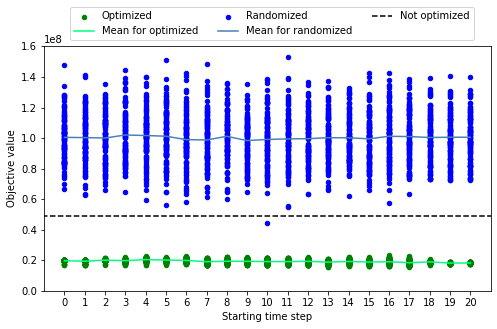

In [20]:
fig, ax = plt.subplots(figsize=(8,5))
# Actual optimization
df.plot.scatter(x='Focus Timestep', y='Objective in NumPixels', ax=ax, color='g', label='Optimized')
meanPerTimeStep.plot.line(y='Objective in NumPixels', ax=ax, color='springgreen', label='Mean for optimized')
# Non-optimized, just order by id
plt.hlines(NoOptById, xmin=-1.5, xmax=21.5, linestyle='dashed', label='Not optimized')
# Randomized, same random order in focus time step as optimized
dfRandom.plot.scatter(x='Focus Timestep', y='Objective in NumPixels', ax=ax, color='b', label='Randomized')
randomMeanPerTimeStep.plot.line(y='Objective in NumPixels', ax=ax, color='steelblue', label='Mean for randomized')
# Optimize, but take the worst option
#dfWorse.plot.scatter(x='Focus Timestep', y='Objective in NumPixels', ax=ax, color='r')
#worseMeanPerTimeStep.plot.line(y='Objective in NumPixels', ax=ax, color='orange')
# Labels
timesteps = 21
labels = np.arange(0, timesteps)
ax.set_xticklabels(labels)
ax.set_xticks(labels)
ax.set_ylabel("Objective value");
ax.set_xlim(-1,21)
ax.set_xlabel("Starting time step");
# Shrink current axis's height by 10% on the top
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height * 0.9])

handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [2,0,4,1,3]
# Put a above current axis
legend=ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper center', bbox_to_anchor=(0.51, 1.18),
          fancybox=True, shadow=False, ncol=3)
lim = ax.get_ylim()
ax.set_ylim(0,lim[1])
figureName = r'E:\Wiebke\MTMResults\Benzene\benzene_optimization\benzene_objectives.pdf'
plt.savefig(figureName, bbox_extra_artists=(legend,), bbox_inches='tight')

In [9]:
print(df[df.Objective == df.Objective.max()])

      Objective  Focus Timestep  Seed  Objective in NumPixels
1643   1.691113            16.0  43.0            2.341488e+07


In [10]:
print(df[df.Objective == df.Objective.min()])

      Objective  Focus Timestep  Seed  Objective in NumPixels
1339   1.139969            13.0  39.0            1.578384e+07


In [11]:
meanPerTimeStep = meanPerTimeStep.drop('Seed',axis='columns')
datafileMean = r'E:\Wiebke\MTMResults\Benzene\benzene_optimization\benzene_objectives_mean.csv'
meanPerTimeStep.to_csv(datafileMean, index=True)
datafilePixels = r'E:\Wiebke\MTMResults\Benzene\benzene_optimization\benzene_objectives_inPixels.csv'
df.to_csv(datafilePixels, index=False)

In [12]:
print(dfWorse[dfWorse.Objective == dfWorse.Objective.max()])

      Objective  Focus Timestep  Seed  Objective in NumPixels
1115  11.735174            11.0  15.0            1.624834e+08


In [13]:
print(dfWorse[dfWorse.Objective == dfWorse.Objective.min()])

      Objective  Focus Timestep  Seed  Objective in NumPixels
1398   9.088739            13.0  98.0            1.258412e+08


In [14]:
worseMeanPerTimeStep = worseMeanPerTimeStep.drop('Seed',axis='columns')
datafileWorseMean = r'E:\Wiebke\MTMResults\Benzene\benzene_optimization\benzene_objectives_worse_mean.csv'
worseMeanPerTimeStep.to_csv(datafileWorseMean, index=True)
datafilePixelsWorse = r'E:\Wiebke\MTMResults\Benzene\benzene_optimization\benzene_objectives_worse_inPixels.csv'
df.to_csv(datafilePixelsWorse, index=False)

In [15]:
print(dfRandom[dfRandom.Objective == dfRandom.Objective.max()])

      Objective  Focus Timestep  Seed  Objective in NumPixels
1183  11.070934            11.0  83.0             153286394.0


In [ ]:
print(dfRandom[dfRandom.Objective == dfRandom.Objective.min()])

In [17]:
randomMeanPerTimeStep = randomMeanPerTimeStep.drop('Seed',axis='columns')
datafileRandomMean = r'E:\Wiebke\MTMResults\Benzene\benzene_optimization\benzene_objectives_random_mean.csv'
randomMeanPerTimeStep.to_csv(datafileRandomMean, index=True)
datafilePixelsRandom = r'E:\Wiebke\MTMResults\Benzene\benzene_optimization\benzene_objectives_random_inPixels.csv'
df.to_csv(datafilePixelsRandom, index=False)

In [15]:
grouped = df.groupby('Focus Timestep')
for t in grouped.groups:
    timestepGroup = grouped.get_group(t)
    print(timestepGroup[timestepGroup.Objective == timestepGroup.Objective.min()])

    Objective  Focus Timestep  Seed  Objective in NumPixels
58   1.242969             0.0  58.0            1.720995e+07
96   1.242969             0.0  96.0            1.720995e+07
     Objective  Focus Timestep  Seed  Objective in NumPixels
139   1.242969             1.0  39.0            1.720995e+07
174   1.242969             1.0  74.0            1.720995e+07
     Objective  Focus Timestep  Seed  Objective in NumPixels
298    1.24309             2.0  98.0            1.721163e+07
     Objective  Focus Timestep  Seed  Objective in NumPixels
300   1.220851             3.0   0.0            1.690371e+07
     Objective  Focus Timestep  Seed  Objective in NumPixels
429   1.222795             4.0  29.0            1.693062e+07
     Objective  Focus Timestep  Seed  Objective in NumPixels
531   1.225477             5.0  31.0            1.696777e+07
     Objective  Focus Timestep  Seed  Objective in NumPixels
672   1.268856             6.0  72.0            1.756838e+07
     Objective  Focus Times

,Objective,Focus Timestep,Seed,Objective in NumPixels
100,1.247522,1.0,0.0,1.727298e+07
101,1.423683,1.0,1.0,1.971209e+07
102,1.243179,1.0,2.0,1.721285e+07
103,1.425608,1.0,3.0,1.973874e+07
104,1.421257,1.0,4.0,1.967849e+07
...,...,...,...,...
195,1.449404,1.0,95.0,2.006822e+07
196,1.431867,1.0,96.0,1.982540e+07
197,1.423651,1.0,97.0,1.971164e+07
198,1.409230,1.0,98.0,1.951198e+07
